In [2]:
from __future__ import division
import numpy as np
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm,datasets
import os
import itertools
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
os.chdir('/home/harsh/Desktop/Harsh_Deshpande/Readable_Data')

In [ ]:
s_slopes = []
t_slopes = []
r_slopes = []
p_slopes = []

f = open ('shannon_slopes.txt','r')
for line in f:
    for word in line.split():
        s_slopes.append(float(word))
f.close()

f = open ('tsallis_slopes.txt','r')
for line in f:
    for word in line.split():
        t_slopes.append(float(word))
f.close()

f = open ('renyi_slopes.txt','r')
for line in f:
    for word in line.split():
        r_slopes.append(float(word))
f.close()

f = open ('permutation_slopes.txt','r')
for line in f:
    for word in line.split():
        p_slopes.append(float(word))
f.close()

means = []
means.append(np.average(s_slopes))
means.append(np.average(t_slopes))
means.append(np.average(r_slopes))
means.append(np.average(p_slopes))

std = []
std.append(np.std(s_slopes))
std.append(np.std(t_slopes))
std.append(np.std(r_slopes))
std.append(np.std(p_slopes))

print (means)
print (std)

In [ ]:
n = 4
b = 0.35
fig , ax = plt.subplots()
index = np.arange(n)
opacity = 0.5
error_config = {'ecolor':'0.0'}
rects1 = ax.bar (index, means, b, alpha=opacity, color='b', yerr=(0,0,0,0), error_kw=error_config,label='Mean')
rects1 = ax.bar (index+b, std, b, alpha=opacity, color='r', yerr=(0,0,0,0), error_kw=error_config,label='Standard Deviation')
ax.set_xlabel('Entropy')
ax.set_ylabel('Value')
ax.set_title('Mean slopes and std_deviation')
ax.set_xticks(index + b/2)
ax.set_xticklabels(('Shannon','Tsallis','Renyi','Permutation'))
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
n_groups = 4



fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
f = open('renyi_slopes_var.txt','r')
r_slopes = []
for line in f:
    #print (line.split()[0].split('[')[1].split(',')[0])
    try:
        r_slopes.append(float(line.split()[0].split('[')[1].split(',')[0]))
    except:
        pass
print (len(r_slopes))  

[625.   0.   0.   0.   0.] [1.00000000e+00 1.30656296e+01 3.49355339e+02 2.91363541e+03
 3.80279048e+04 1.92299937e+05 1.52179186e+06 3.75631626e+06
 1.89747360e+07]


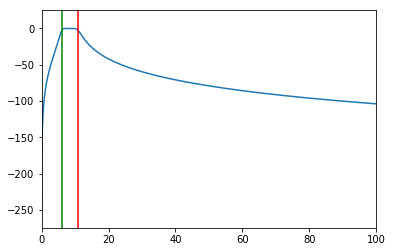

In [8]:
b, a = signal.butter(4, (6,11), 'band', analog=True)
print (b,a)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.margins(0, 0.1)
plt.axvline(6, color='green')
plt.axvline(11, color='red')
plt.show()

In [3]:
from scipy import signal

In [ ]:
sig = []
f = 8
f1 = 80
fs = 1000
r = fs/2
cut = [6/r,11/r]
b, a = signal.butter(4, cut, 'band')
for t in range (0,2001):
    sig.append (20*np.sin (2*np.pi*f*t/1000) + np.sin(2*np.pi*f1*t/1000))
out = signal.filtfilt(b,a,sig)
plt.plot(sig,'r')
plt.plot(out,'b')

In [1]:
from sklearn import svm
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accuracy_svm (data_set1 , data_set2 , cc , gg):
	accuracy = []
	l = len(data_set1)
	if l != len (data_set2):
		print ("error")
		print (l)
		print (len(data_set2))
	for i in range (0,5):
		fatigue_train1 = []
		fatigue_train2 = []
		fatigue_test1 = []
		fatigue_test2 = []		
		test1 = data_set1[int(i*l/5):int((i+1)*l/5)]
		test2 = data_set2[int(i*l/5):int((i+1)*l/5)]
		#print(type(test1))
		if i == 0:
			train1 = data_set1[int(l/5):l]
			train2 = data_set2[l//5:l]
		elif i == 4 :
			train1 = data_set1[0:4*l//5]
			train2 = data_set2[0:4*l//5]	
		else:
			train1 = data_set1[0:i*l//5]
			train1 = np.concatenate((train1,data_set1[(i+1)*l//5:l]),axis = 0)
			train2 = data_set2[0:i*l//5]
			train2 = np.concatenate((train2 ,data_set2[(i+1)*l//5:l]) , axis =0)
		test1 = np.concatenate((test1,test2),axis=0)
		train1 = np.concatenate((train1,train2), axis=0)
		#print (test1.shape)
		#print (len(test1[0]))	
		for k in range (0,int(4*l//5)):
			fatigue_train1.append(0)
			fatigue_train2.append(1)
			if(k<int(l//5)):
				fatigue_test1.append(0)
				fatigue_test2.append(1)	
		#print (len(fatigue_train1))		
		fatigue_train1 += fatigue_train2
		fatigue_train = np.array(fatigue_train1)
		#print (len(fatigue_train))
		fatigue_test1 += fatigue_test2 		
		fatigue_test = np.array(fatigue_test1)
		#print (len(fatigue_test))
		clf = svm.SVC(kernel='rbf', C=cc, gamma = gg )				
		clf.fit (train1 , fatigue_train1)
		fatigue_result = clf.predict(test1)
		y = 0
		n = 0
		for i in range (0,len(fatigue_result)):
			if (fatigue_result[i] == fatigue_test1[i]):
				y=y+1
			else:
				n=n+1
		accuracy_curr = y/(y+n)		
		accuracy.append (float(100*accuracy_curr))
	accuracy = np.array(accuracy)
	#print (accuracy)
	mean = accuracy.mean()
	std = accuracy.std()
	return (mean , std)

In [3]:
result = []
#Get features in this part  should be an array of arrays or list of list with each small list containing features of one segment and many such lists
# Assumed final list os lists is in entropies_train[[]]
#For each list give in array fatigue =1 and not-fatigue=0
#Do_same for test data

# mean_old = 0
# cc_max , gg_max = (0,0)
for entropy in ["shannon","tsallis","renyi","permut"]:#,"tsallis","renyi","permut"]:	
	# for ccc in range (50,100):
	# 	for ggg in range (50,100):						#(6.1,8.4)
	cc = 9.8
	gg = 9.9
	print (cc,gg)
	#print (cc,gg)
	mean_accuracies = []
	std_accuracies = []
	#print (entropy)
	accuracy = []
	for sub in range (1,31):
		for turn in range (1,3):
			data_set1 = []
			data_set2 = []
			for ch in range (1,25):
					os.chdir ('/media/harsh/DATA/Readable_Data/Entropies')
					file_name = entropy+"s"+str(sub)+"t"+str(turn)+"c"+str(ch)+".txt"
					#print (file_name)
					f = open (file_name , 'r')
					n = 0
					temp = []
					a=0
					for line in f:
						for word in line.split() :
							#a = a+1
							#print (a)
							#print (word)
							temp.append(str(float(word)))
					f.close()				
					data1 = temp[0:300]
					data2 = temp[len(temp)-300:len(temp)]
					data_set1.append(data1)
					data_set2.append(data2)
			data_set1 = np.array(data_set1)
			x , y = data_set1.shape
			#print (x,y)
			# if (y!=24):
			# 	print ("error")
			# 	print (y)
			# 	print (x)
			data_set1 = data_set1.reshape((y,x))
			data_set2 = np.array(data_set2)
			x , y = data_set2.shape
			#print (x,y)
			data_set2 = data_set2.reshape(y,x)
			#print (len(data_set2[0]))
			mean , std = accuracy_svm(data_set1 , data_set2 , cc , gg)
			accuracy.append(mean)
			#accuracy_std.append(std)
	accuracy = np.array(accuracy)		
	accuracy_std = accuracy.std()		
	mean = accuracy.mean()
	minn , maxx = (accuracy.min() , accuracy.max())
	# if (mean > mean_old):
	# 		cc_max = cc
	# 		gg_max = gg
	# 		mean_old = mean
	# 		print (mean,accuracy_std,entropy)
	result.append(np.array((mean,accuracy_std,entropy,minn,maxx))	)	
	# print (result)
	# print (entropy + " done")		
			# mean_accuracies.append(mean)
			# std_accuracies.append(std)
print (type(result))

9.8 9.9
9.8 9.9
9.8 9.9
9.8 9.9
<class 'list'>


In [5]:
means = []
sdeviations = []
legends = []
min_max = []
result = np.array(result)
for i in range (0,4):
	means.append(result[i][0])
	sdeviations.append(result[i][1])
	legends.append(result[i][2])
	min_max.append((result[i][3],result[i][4]))

print (type(means[0]))

<class 'numpy.str_'>


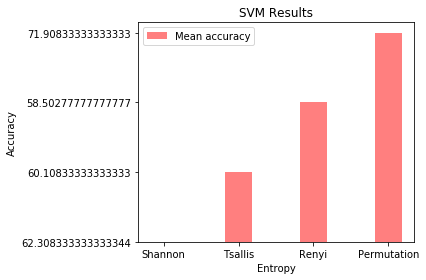

In [7]:
n = 4
b = 0.35
fig , ax = plt.subplots()
index = np.arange(n)
opacity = 0.5
error_config = {'ecolor':'2.0'}
rects1 = ax.bar (index, means, b, alpha=opacity, color='r', yerr=(0,0,0,0), error_kw=error_config,label='Mean accuracy')
#ects2 = ax.bar (index+b, std_accuracies, b, alpha=opacity, color='b', yerr=(0,0,0,0), error_kw=error_config,label='Standard Deviation of accuracies')
ax.set_xlabel('Entropy')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Results')
ax.set_xticks(index )
ax.set_xticklabels(('Shannon','Tsallis','Renyi','Permutation'))
ax.legend()
fig.tight_layout()
plt.show()